## Download data  

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 23.3MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 13.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## Tiền xử lý dữ liệu dạng table

### Lấy label và chia bộ dữ liệu train/val

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### Chuẩn hóa dữ liệu (Data Standardisation)

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### Linear Regression - MAE (Optional)

In [ ]:
MAE_linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[9])
])

opt = tf.optimizers.SGD(learning_rate=0.1)
MAE_linear_model.compile(optimizer=opt, loss='mae',
                     metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanSquaredError()])
# MAE_linear_history = MAE_linear_model.fit( X_train, y_train, epochs=100, validation_split = 0.2)
MAE_linear_history = MAE_linear_model.fit( X_train, y_train, validation_data=(X_val, y_val) ,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 75ms/step - loss: 22.8792 - r_square: -8.4139 - mean_squared_error: 560.5206 - val_loss: 22.8752 - val_r_square: -7.5989 - val_mean_squared_error: 561.5635
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 21.8808 - r_square: -7.6500 - mean_squared_error: 515.0344 - val_loss: 21.8767 - val_r_square: -6.9192 - val_mean_squared_error: 517.1774
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 20.8808 - r_square: -6.9493 - mean_squared_error: 473.3145 - val_loss: 20.8761 - val_r_square: -6.2649 - val_mean_squared_error: 474.4455
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 19.8817 - r_square: -6.2495 - mean_squared_error: 431.6483 - val_loss: 19.8755 - val_r_square: -5.6392 - val_mean_squared_error: 433.5854
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 18.8881 - r_square: -5.6005 - mean_squared_error: 393.0078 - val_loss: 18.8733 

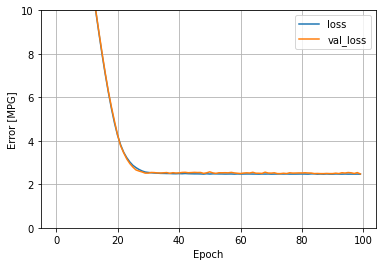

In [ ]:
plt.plot(MAE_linear_history.history['loss'], label='loss')
plt.plot(MAE_linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MAE_linear_history.history)
hist['epoch'] = MAE_linear_history.epoch
hist.tail()

,loss,r_square,mean_squared_error,val_loss,val_r_square,val_mean_squared_error,epoch
95,2.468482,0.795052,12.203007,2.541936,0.796751,13.273538,95
96,2.469990,0.791658,12.405031,2.529611,0.798234,13.176703,96
97,2.469372,0.792029,12.382980,2.498670,0.802803,12.878265,97
98,2.470685,0.793937,12.269379,2.538644,0.797862,13.200994,98
99,2.466293,0.793645,12.286752,2.476350,0.805983,12.670609,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MSE: ", min(hist['mean_squared_error']))
print("Min val MSE: ", min(hist['val_mean_squared_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  2.4658844470977783
Min val loss:  2.4763500690460205
Min MSE:  12.17094612121582
Min val MSE:  12.670608520507812
Max r-squared loss:  0.7955902218818665
Max val r-squared loss:  0.8059831857681274
